<a href="https://colab.research.google.com/github/emmanuelsheshi/CustomStyledButtons/blob/master/RescueNetAgain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!gdown https://drive.google.com/file/d/1--bWWNysifDVFES9gbZrPg_P2jqiBL4e/view?usp=drive_link --fuzzy



Downloading...
From (original): https://drive.google.com/uc?id=1--bWWNysifDVFES9gbZrPg_P2jqiBL4e
From (redirected): https://drive.google.com/uc?id=1--bWWNysifDVFES9gbZrPg_P2jqiBL4e&confirm=t&uuid=f7cd3eb4-a8c8-4799-91c6-bacef88c4bf0
To: /content/RescueNet.zip
100% 23.7G/23.7G [03:19<00:00, 119MB/s]


In [ ]:
!unzip RescueNet.zip -d RescueNet

Streaming output truncated to the last 5000 lines.
 extracting: RescueNet/train/train-org-img/20435.jpg  
 extracting: RescueNet/train/train-org-img/14215.jpg  
 extracting: RescueNet/train/train-org-img/14009.jpg  
 extracting: RescueNet/train/train-org-img/14259.jpg  
 extracting: RescueNet/train/train-org-img/14198.jpg  
 extracting: RescueNet/train/train-org-img/14072.jpg  
 extracting: RescueNet/train/train-org-img/11820.jpg  
 extracting: RescueNet/train/train-org-img/14118.jpg  
 extracting: RescueNet/train/train-org-img/14229.jpg  
 extracting: RescueNet/train/train-org-img/14004.jpg  
 extracting: RescueNet/train/train-org-img/11263.jpg  
 extracting: RescueNet/train/train-org-img/14272.jpg  
 extracting: RescueNet/train/train-org-img/14102.jpg  
 extracting: RescueNet/train/train-org-img/13267.jpg  
 extracting: RescueNet/train/train-org-img/14255.jpg  
 extracting: RescueNet/train/train-org-img/14268.jpg  
 extracting: RescueNet/train/train-org-img/13561.jpg  
 extracting: R

In [ ]:
import numpy as np
import tensorflow as tf
from  tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D,\
                             Dropout, Layer, Input, BatchNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.utils import Sequence
import tensorflow.image as tfimg
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import math
import random
import glob
import time
from sklearn.model_selection import train_test_split
seed = 42
np.random.seed(seed)
import pickle
from tensorflow.keras import backend as K
import os
import glob
import cv2
from tqdm import tqdm
import re

batch_size = 8   #8




In [ ]:
#process the images

#resize the images must be a multiple of 48
SIZE_X = 768
SIZE_Y = 768
n_classes=11 #Number of classes for segmentation
#set the image limit here.....

image_limit_set = 2000




In [ ]:
train_images = []
directory_path ="RescueNet/train/train-org-img"

image_paths = glob.glob(os.path.join(directory_path, "*.jpg"))

image_paths.sort(key=lambda x: int(os.path.basename(x).split('.')[0]))

image_limit = image_limit_set - 1

for count,img_path in enumerate(tqdm(image_paths)):

      if count <= image_limit:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE_Y, SIZE_X),interpolation=cv2.INTER_NEAREST)
        fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        train_images.append(fix_img)


# convert the images to a numy array
train_images = np.array(train_images)
train_images.shape

100%|██████████| 3595/3595 [04:19<00:00, 13.84it/s]


(2000, 768, 768, 3)

In [ ]:
# Directory containing the mask files
directory_path_masks = "RescueNet/train/train-label-img"

# Step 1: Get all mask files in the directory that contain "_lab" in their names
image_mask_paths = glob.glob(os.path.join(directory_path_masks, "*_lab.*"))

# Limit to the first 200 files for renaming
rename_limit = image_limit_set

# Rename only the first 200 mask files
for count, mask_file in enumerate(image_mask_paths):
    # if count >= rename_limit:
    #     break  # Stop if the count exceeds the rename limit

    # Extract the directory and filename
    dir_name = os.path.dirname(mask_file)
    base_name = os.path.basename(mask_file)

    # Remove "_lab" from the filename
    new_base_name = base_name.replace("_lab", "")

    # Construct the new file path
    new_mask_file = os.path.join(dir_name, new_base_name)

    # Rename the file
    os.rename(mask_file, new_mask_file)

    # Confirm that the old file does not exist and new file exists
    if not os.path.exists(mask_file) and os.path.exists(new_mask_file):
        print(f"Renamed: {mask_file} -> {new_mask_file}")
    else:
        print(f"Error renaming: {mask_file}")

Renamed: RescueNet/train/train-label-img/11132_lab.png -> RescueNet/train/train-label-img/11132.png
Renamed: RescueNet/train/train-label-img/15645_lab.png -> RescueNet/train/train-label-img/15645.png
Renamed: RescueNet/train/train-label-img/15262_lab.png -> RescueNet/train/train-label-img/15262.png
Renamed: RescueNet/train/train-label-img/12289_lab.png -> RescueNet/train/train-label-img/12289.png
Renamed: RescueNet/train/train-label-img/12804_lab.png -> RescueNet/train/train-label-img/12804.png
Renamed: RescueNet/train/train-label-img/15077_lab.png -> RescueNet/train/train-label-img/15077.png
Renamed: RescueNet/train/train-label-img/16062_lab.png -> RescueNet/train/train-label-img/16062.png
Renamed: RescueNet/train/train-label-img/11167_lab.png -> RescueNet/train/train-label-img/11167.png
Renamed: RescueNet/train/train-label-img/15064_lab.png -> RescueNet/train/train-label-img/15064.png
Renamed: RescueNet/train/train-label-img/13455_lab.png -> RescueNet/train/train-label-img/13455.png


In [ ]:
directory_path_masks ="RescueNet/train/train-label-img"
train_masks = []

image_paths_mask = glob.glob(os.path.join(directory_path_masks, "*.png"))

image_paths_mask.sort(key=lambda x: int(os.path.basename(x).split('.')[0]))


for count,img_path in enumerate(tqdm(image_paths_mask)):
      # print(img_path)
      if count <= image_limit:
        img = cv2.imread(img_path)
        img = cv2.resize(img, (SIZE_Y, SIZE_X),interpolation=cv2.INTER_NEAREST)
        fix_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        R, G, B = fix_img[:,:,0], fix_img[:,:,1],fix_img[:,:,2]
        Z = 0.2126 * R + 0.7152 * G + 0.0722 * B # luminosity method

        train_masks.append(Z)
# convert the images to a numy array
train_masks = np.array(train_masks)
train_masks.shape



100%|██████████| 3595/3595 [02:38<00:00, 22.68it/s]


(2000, 768, 768)

In [ ]:
# convert the masks to a numy array
train_masks = np.array(train_masks)
train_masks.shape
unique_values = np.unique(train_masks)
unique_values

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

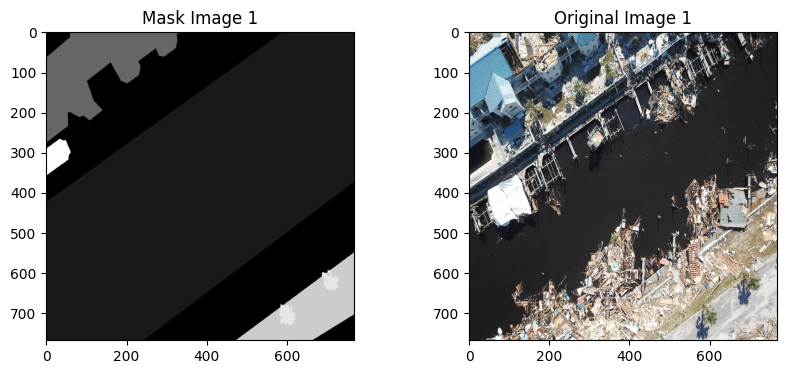

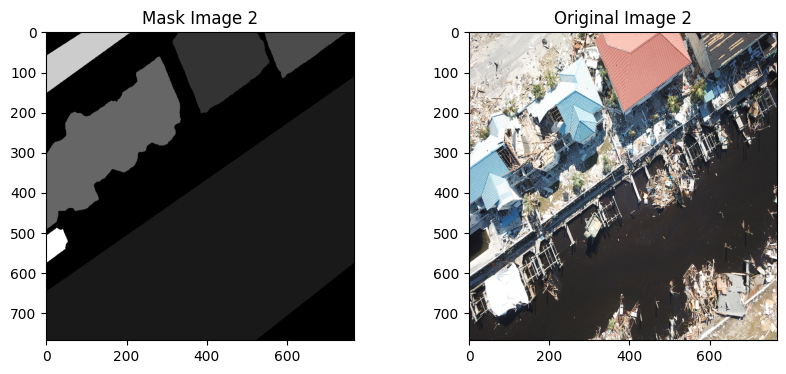

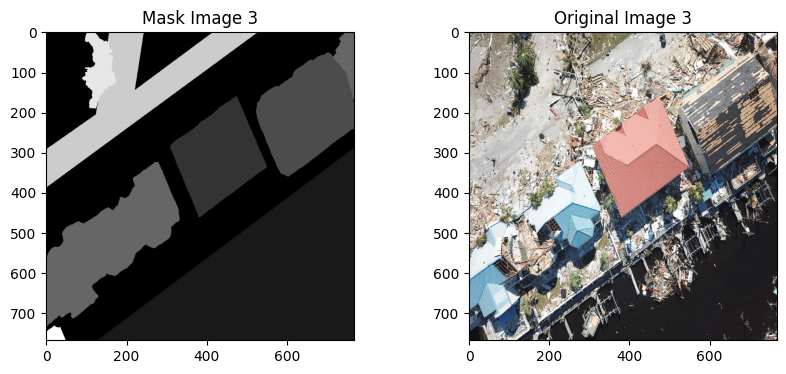

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
num_images = 3

# Loop through the first 5 images
for i in range(num_images):
    # Plot the mask image
    plt.figure(figsize=(10, 4))

    # Plot the mask image
    plt.subplot(1, 2, 1)
    plt.imshow(train_masks[i], cmap='gray')
    plt.title(f"Mask Image {i+1}")

    # Plot the original image
    plt.subplot(1, 2, 2)
    plt.imshow(train_images[i])
    plt.title(f"Original Image {i+1}")


    plt.show()

In [ ]:
#Encode labels... but multi dim array so need to flatten, encode and reshape
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
n, h, w = train_masks.shape
train_masks_reshaped = train_masks.reshape(-1,1)
train_masks_reshaped_encoded = labelencoder.fit_transform(train_masks_reshaped)
train_masks_encoded_original_shape = train_masks_reshaped_encoded.reshape(n, h, w)
np.unique(train_masks_encoded_original_shape)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
from keras.utils import normalize
train_masks_input = np.expand_dims(train_masks_encoded_original_shape, axis=3)
train_images.shape, train_masks_input.shape





((2000, 768, 768, 3), (2000, 768, 768, 1))

In [ ]:
from sklearn.model_selection import train_test_split
X1, X_test, y1, y_test = train_test_split(train_images, train_masks_input, test_size = 0.1, random_state = 0)
#Further split training data t a smaller subset for quick testing of models
X_train, X_do_not_use, y_train, y_do_not_use = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
print("Class values in the dataset are ... ", np.unique(y_train))  # 0 is the background/few unlabeled

Class values in the dataset are ...  [ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
from keras.utils import to_categorical
train_masks_cat = to_categorical(y_train, num_classes=n_classes)
y_train_cat = train_masks_cat.reshape((y_train.shape[0], y_train.shape[1], y_train.shape[2], n_classes))



test_masks_cat = to_categorical(y_test, num_classes=n_classes)
y_test_cat = test_masks_cat.reshape((y_test.shape[0], y_test.shape[1], y_test.shape[2], n_classes))



In [ ]:
IMG_HEIGHT =   X_train.shape[1]
IMG_WIDTH  =   X_train.shape[2]
IMG_CHANNELS = X_train.shape[3]

IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS

(768, 768, 3)

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger

# Define callbacks
model_checkpoint = ModelCheckpoint(
    'best_model.keras',  # Path where to save the model file
    monitor='val_loss',  # Metric to monitor
    save_best_only=True,  # Save only the best model
    mode='min',  # Mode to determine the best model ('min' for minimizing loss)
    verbose=1  # Verbosity mode
)

early_stopping = EarlyStopping(
    monitor='val_loss',  # Metric to monitor
    patience=10,  # Number of epochs with no improvement after which training will be stopped
    mode='min',  # Mode to determine early stopping ('min' for minimizing loss)
    verbose=1  # Verbosity mode
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Metric to monitor
    factor=0.2,  # Factor by which the learning rate will be reduced
    patience=5,  # Number of epochs with no improvement after which learning rate will be reduced
    mode='min',  # Mode to determine when to reduce learning rate ('min' for minimizing loss)
    verbose=1  # Verbosity mode
)

csv_logger = CSVLogger(
    'training_log.csv',  # Path where to save the log file
    append=True,  # Whether to append to an existing file
    separator=','  # Delimiter to use in the CSV file
)


In [ ]:
!pip install segmentation-models
!pip install -U -q segmentation-models

import os
os.environ["SM_FRAMEWORK"] = "tf.keras"


In [ ]:
from segmentation_models import PSPNet
from segmentation_models.losses import categorical_focal_loss
from segmentation_models.metrics import iou_score

Segmentation Models: using `tf.keras` framework.


In [ ]:
def pspnet_model(n_classes, IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    model = PSPNet(
        input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
        classes=n_classes,
        activation='softmax'  # Change this if you need a different activation
    )
    return model


In [ ]:

def get_pspnet_model():
    return pspnet_model(n_classes=n_classes, IMG_HEIGHT=IMG_HEIGHT, IMG_WIDTH=IMG_WIDTH, IMG_CHANNELS=IMG_CHANNELS)










In [ ]:
model = get_pspnet_model()
model.compile(optimizer='adam', loss=categorical_focal_loss, metrics=[iou_score])


58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.utils import Sequence
import numpy as np

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y

train_gen = DataGenerator(X_train, y_train_cat, batch_size)
test_gen = DataGenerator(X_test, y_test_cat, batch_size)

In [ ]:
model.fit(
    train_gen,  # Your training data
    validation_data=test_gen,  # Your validation data
    epochs=50,
    verbose=1,
    callbacks=[csv_logger,model_checkpoint, early_stopping]
)


Epoch 1/50
180/180 [==============================] - ETA: 0s - loss: 0.0221 - iou_score: 0.0861 
Epoch 1: val_loss improved from inf to 0.06399, saving model to best_model.keras
180/180 [==============================] - 2452s 14s/step - loss: 0.0221 - iou_score: 0.0861 - val_loss: 0.0640 - val_iou_score: 0.0908
Epoch 2/50
180/180 [==============================] - ETA: 0s - loss: 0.0180 - iou_score: 0.1031 
Epoch 2: val_loss improved from 0.06399 to 0.02641, saving model to best_model.keras
180/180 [==============================] - 2449s 14s/step - loss: 0.0180 - iou_score: 0.1031 - val_loss: 0.0264 - val_iou_score: 0.0765
Epoch 3/50
180/180 [==============================] - ETA: 0s - loss: 0.0174 - iou_score: 0.1097 
Epoch 3: val_loss improved from 0.02641 to 0.01720, saving model to best_model.keras
180/180 [==============================] - 2444s 14s/step - loss: 0.0174 - iou_score: 0.1097 - val_loss: 0.0172 - val_iou_score: 0.0975
Epoch 4/50
125/180 [===================>.......